<a href="https://colab.research.google.com/github/AlineCrawf/data_science_projects_google_colab/blob/main/MMMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математическое моделирование. Ткаченко Алина. 5й вариант

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math 
import scipy.constants as const

# Лабораторная 1

Построить математическую модель для своего варианта задания - 5. При построении модели учитывать следующую постановку:

Шарик M, рассматриваемый как материальная точка, перемещается по цилиндрическому каналу движущегося тела A, необходимо определить закон относительного движения шарика x=f(t), приняв за начало отсчета точку O. Тело A равномерно вращается вокруг неподвижной оси z1.

Построение модели проводить в общем случае, рассматривая все возможные варианты решения.

Для завершения математического описания к взаимосвязям и методам вычисления следует добавить числовые и функциональные данные параметров объекта, которые позволят вычислить требуемые величины согласно варианту задания из таблицы. Построить приложение позволяющее моделировать относительное движение точки в имеющейся поставке. Приложение должно иметь функциональные возможности изменения параметров модели, выбрав за значения по умолчанию, имеющиеся в таблице.

Провести анализ полученных результатов моделирования движения и составить отчет.

*Замечание. Использовать материал лекций 2-3.*

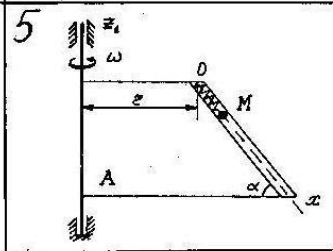

**m*W2 = G + P + N1 + N2 + Φₑ + Φₛ**


---


Проекции на ось:
1. x: mx = G * sin(α) - P + Φₑ * cos(α) 
2. y: 0 = N1 - G* cos(α) + Φₑ * sin(α)
3. z: 0 = N2 + Φₛ 


---


* Φₑ = m * 𝔴^2 * x * cos(α)
* Φₛ = 2 * 𝔴 * x * m
* P = c(l0 - x)


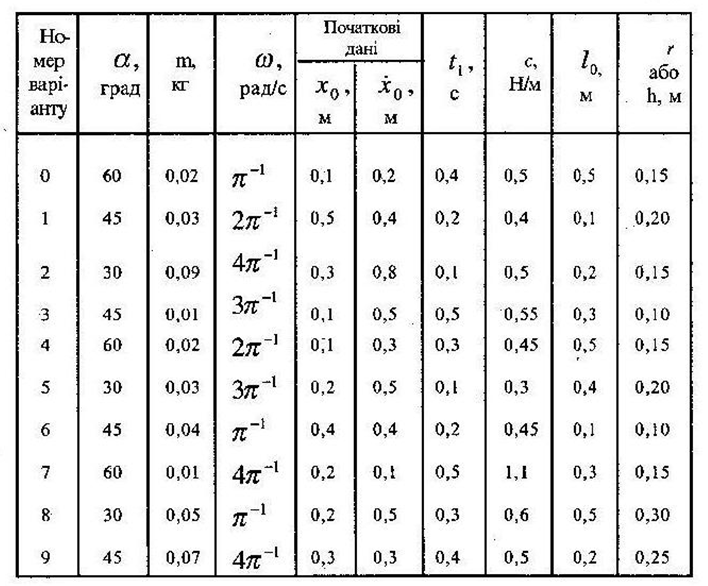

* k = m * w ^2 * sin(α) - c/m
* B = G * cos(α)* cos(α) - c*l0/m

In [ ]:
def B_func(alpha, c, l0, m):
   return const.g * np.sin(alpha) - c*l0/m

In [ ]:
def k_sqr_func(m, w, alpha, c):
  return m * w*w * np.cos(alpha)*np.cos(alpha) - c/m

In [ ]:
def x_func(k_sqr, B, x0, xdot0, t):
  if k_sqr > 0:
      k = math.sqrt(k_sqr)
      return (x0 - B / k_sqr) * np.cos(k * t) \
        + (xdot0 / k) * np.sin(k * t) + B / k_sqr

  if k_sqr < 0:
    sqrt_abs_k_sqr = math.sqrt(np.abs(k_sqr))
    return (x0 / 2 + xdot0 / (2 * sqrt_abs_k_sqr) \
            - B / (2 * k_sqr)) * np.exp(sqrt_abs_k_sqr * t) \
            + (x0 / 2 - xdot0 / (2 * sqrt_abs_k_sqr)\
            - B / (2 * k_sqr)) * np.exp(-sqrt_abs_k_sqr * t) \
            + B / k_sqr

  return x0 + xdot0 * t + (B * t * t) / 2

In [ ]:
def simulate(alpha, m, w, x0, xdot0, time, c, l0):
  B = B_func(alpha, c, l0, m)
  k_sqr = k_sqr_func(m, w, alpha, c)

  return x_func(k_sqr, B, x0, xdot0, time)

Переменные из таб.1

In [ ]:
default = {
  "alpha" : math.radians(30), 
  "m" : 0.03,
  "w" : 1 / (3 * math.pi),
  "x0" : 0.2,
  "xdot0" : 0.5,
  "t" : 10,
  "c" : 0.3,
  "l0" : 0.4,
  "r" : 0.2 
}



In [ ]:
def simulate_and_plot( m = default['m'], w = default['w'], x0 = default['x0'], \
                      xdot0 = default['xdot0'], t = default['t'], c = default["c"],\
                      l0 = default["l0"], alpha = default["alpha"], r = default["r"]): #
  n = 20000
  time = np.linspace(0, t, n)

  x = simulate(alpha, m, w, x0, xdot0, time, c, l0)

  plt.rcParams["figure.figsize"] = (10,7)
  plt.plot(time, x, "k")
  plt.title("Аналитика")
  plt.xlabel("time")
  plt.ylabel("x")
  plt.grid()
  plt.show()

  return x

Тестирование со значениями из таблицы 1

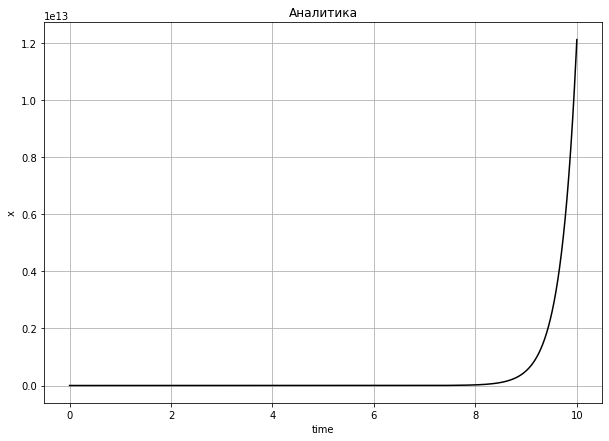

In [ ]:
default_coef = simulate_and_plot()

Увеличим массу до 0.5 кг



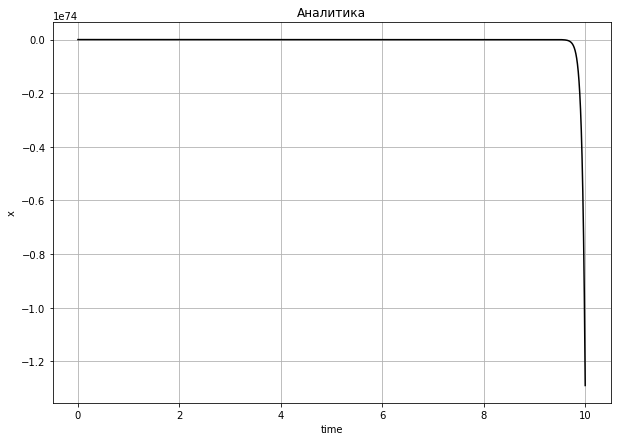

In [ ]:
m_0_001 = simulate_and_plot(m = 0.001)

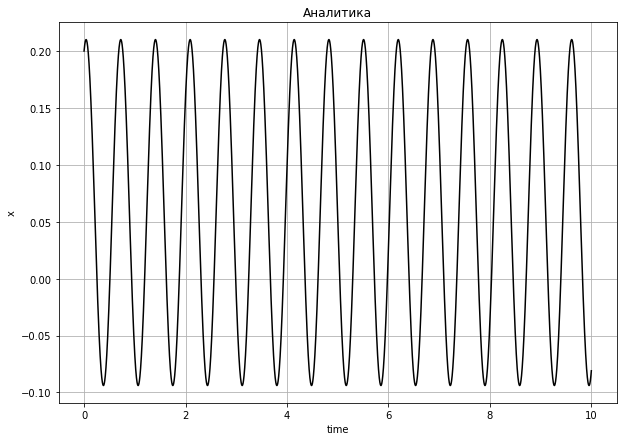

In [ ]:
m_10000 = simulate_and_plot(m = 10000)

#Задание 2
Для анализа модели первой лабораторной работы применить численный метод Рунге – Кутта.
Провести сравнительный анализ решений полученных аналитическим и численным методом.
Найти абсолютную и относительную погрешность вычислений.


## Code

In [ ]:
class Runge_Kutta:
  def __init__(self, alpha = default["alpha"], c = default["c"], l0 = default["l0"],\
               m = default['m'], w = default['w']):
    self.alpha = alpha
    self.c = c
    self.l0 = l0
    self.m = m
    self.w = w

  def F(self, t, y1, y2): 
    return B_func(self.alpha, self.c, self.l0, self.m) \
    - k_sqr_func(self.m, self.w,self.alpha, self.c) * y1

  def runge_kutta(self, t, y1, y2, r):
    k1 = r * self.F(t, y1, y2)
    k2 = r * self.F(t + r / 2, y1 + r / 2 * y2 + r / 8 * k1, y2 + k1 / 2)
    k3 = r * self.F(t + r / 2, y1 + r / 2 * y2 + r / 8 * k2, y2 + k2 / 2)
    k4 = r * self.F(t + r, y1 + r * y2 + r / 2 * k3, y2 + k3)
    return y1 + r * (y2 + (k1 + k2 + k3) / 6), y2 + (k1 + 2 * k2 + 2 * k3 + k4) / 6

  def simulate(self, time, y1, y2, r):
    y1_arr = np.array([y1])
    y2_arr = np.array([y2])

    for i, t in enumerate(time[1:]):
      y1_new, y2_new = self.runge_kutta(t, y1_arr[i], y2_arr[i], r)
      y1_arr = np.append(y1_arr, y1_new)
      y2_arr = np.append(y2_arr, y2_new)

    return y1_arr

  def simulate_and_plot(self, r = 0.0005, t = default['t'],\
                        y1 = default['x0'], y2 = default['xdot0']):
    n = int( t / r )
    time = np.linspace(0, t, n)

    x =  self.simulate(time, y1, y2, r)

    plt.rcParams["figure.figsize"] = (10,7)
    plt.plot(time, x, "k")
    plt.title("Численные методы")
    plt.xlabel("time")
    plt.ylabel("x")
    plt.grid()
    plt.show()

    return x

### Test test

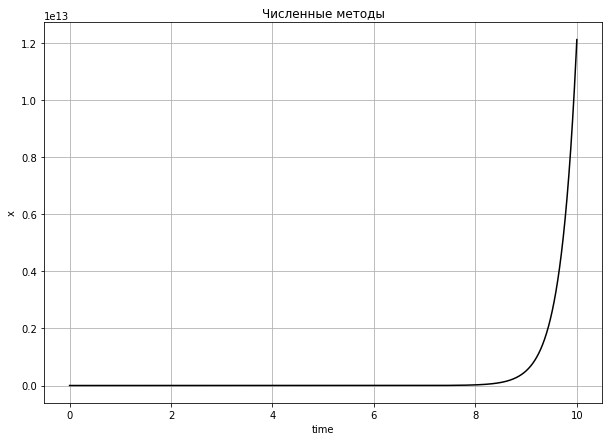

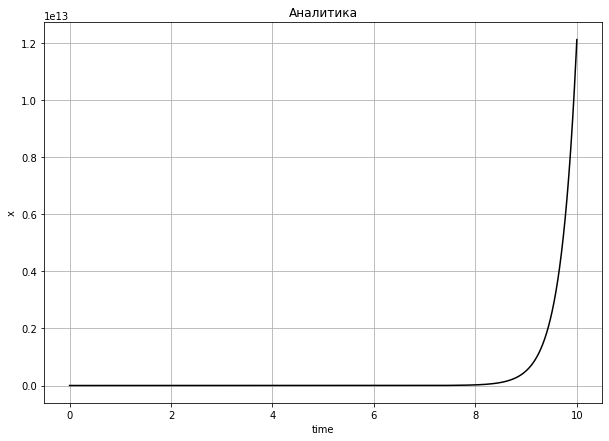

In [ ]:
r_k = Runge_Kutta()
default_coef_rk = r_k.simulate_and_plot()

default_coef = simulate_and_plot()

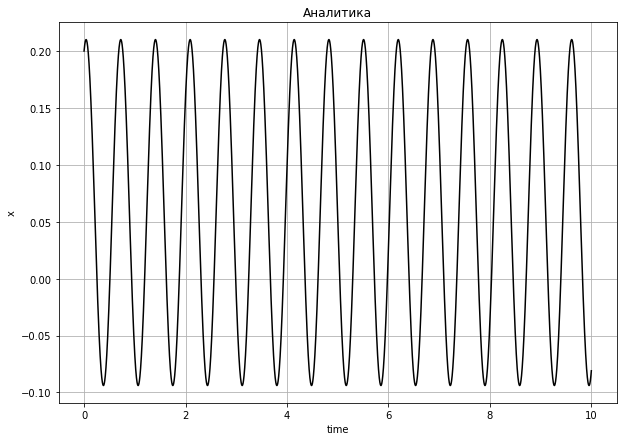

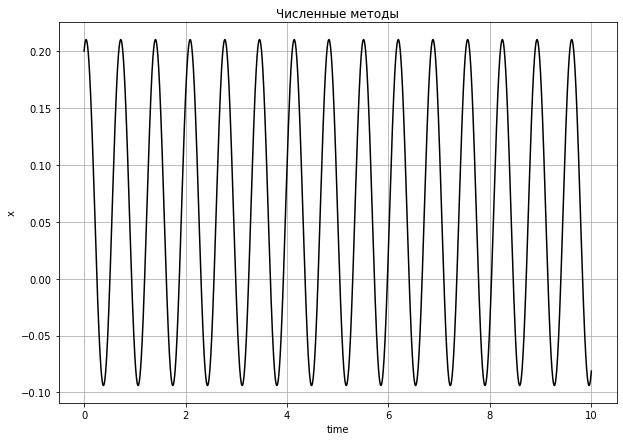

In [ ]:
m_10000 = simulate_and_plot(m = 10000)

r_k = Runge_Kutta(m = 10000)
m_10000_rk = r_k.simulate_and_plot()

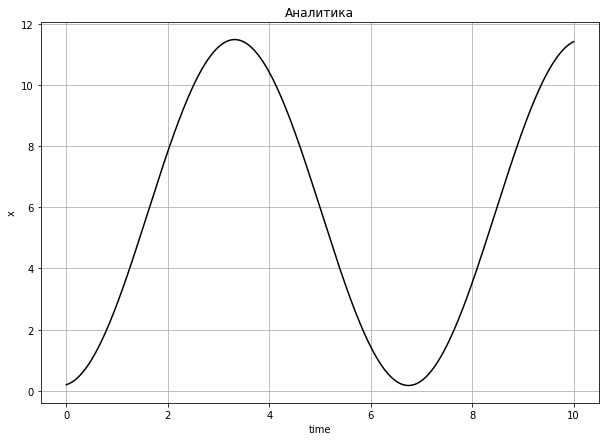

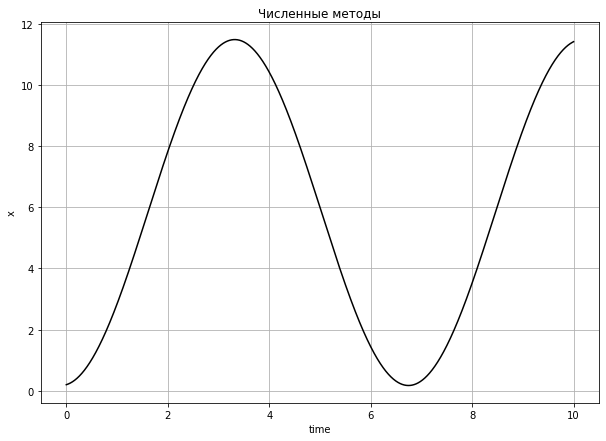

In [ ]:
m_0_0001 = simulate_and_plot(m = 100)

r_k = Runge_Kutta(m = 100)
m_0_0001_rk = r_k.simulate_and_plot()

# Тестирование 1 & 2

Saved
{'alpha': 1.0471975511965976, 'm': 1000, 'w': 0.1061032953945969, 'x0': 0.2, 'xdot0': 0.5, 't': 10, 'c': 1, 'l0': 10, 'r': 0.5}
Plots...


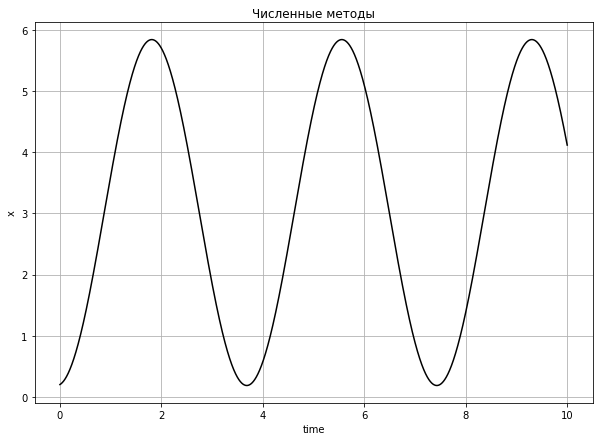

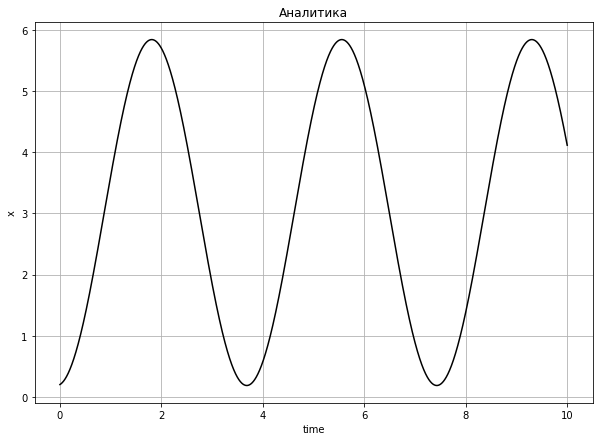

MAE = 14.7636096347664,          MSE = 0.02315324807522462


In [ ]:
#@title <- Нажмите на знак, чтобы построить графики (или сочетание Crtl + Enter)
radian = 60 #@param {type:"slider", min:0, max:100, step:1}
m =     1000#@param {type:"number"}
x0 = 0.2    #@param {type:"number"}
xdot0 = 0.5 #@param {type:"number"}
t = 10      #@param {type:"number"}
c =      1#@param {type:"number"}
l0 = 10    #@param {type:"number"}
r = 0.5       #@param {type:"number"}

default["alpha"] = math.radians(radian)                                                               
default["m"] = m    
default["x0"] = x0 
default["xdot0"] = xdot0
default["t"] = t 
default["c"] = c 
default["l0"] = l0 
default['r'] = r
print("Saved")
print(default)
print("Plots...")

r_k = Runge_Kutta(alpha = default["alpha"], c = default["c"], l0 = default["l0"],\
            m = default['m'], w = default['w'])
y = r_k.simulate_and_plot()
x = simulate_and_plot(m = default['m'], w = default['w'], x0 = default['x0'], \
                  xdot0 = default['xdot0'], t = default['t'], c = default["c"],\
                  l0 = default["l0"], alpha = default["alpha"])

print(f'MAE = {np.sum(np.absolute((x - y)))}, \
         MSE = {np.abs((np.sum(np.absolute((x - y))) \
                        / np.sum(x))) * 100}')




# Лабораторная 3
Построим модель движения шарика  M, в предыдущей постановке, усложняя модель движением шарика  по шероховатому цилиндрическому каналу движущегося тела A. Значение коэффициента силы трения скольжения по умолчанию  f = 0.1. Кроме графика закона относительного движения шарика, построить графики нормальных составляющих сил реакций связи N1 и N2 , а также их результирующей N = sqrt(N1^2+N2^2) .

## Код

In [ ]:
class Runge_Kutta_v_3(Runge_Kutta):
  def __init__(self, alpha = math.radians(60), c = 1.1, l0 = 0.3, m = 0.01, w = 1 / (4 * math.pi), r = 0.03, f = 0.1):
    self.alpha = alpha
    self.c = c
    self.l0 = l0
    self.m = m
    self.w = w
    self.r = r
    self.f = f

  def N2_f(self, t, y1, y2):
    return 2 * self.m * self.w * y2 

  def N1_f(self, t, y1, y2):
    return  const.g * math.cos(self.alpha) - \
      self.m *self.w * self.w * y2 * math.cos(self.alpha) * math.sin(self.alpha)

  def F(self, t, y1, y2, f): 
    return -B_func(self.alpha, self.c, self.l0, self.m) \
    - k_sqr_func(self.m, self.w,self.alpha, self.c) * y1 \
    - np.sign(y2) * f * math.sqrt((self.N1_f( t, y1, y2) / self.m)**2 + (self.N2_f( t, y1, y2) / self.m)**2)

  def runge_kutta(self, t, y1, y2, h, f):
    k1 = h * self.F(t, y1, y2, f)
    k2 = h * self.F(t + h / 2, y1 + h / 2 * y2 + h / 8 * k1, y2 + k1 / 2, f)
    k3 = h * self.F(t + h / 2, y1 + h / 2 * y2 + h / 8 * k2, y2 + k2 / 2, f)
    k4 = h * self.F(t + h, y1 + h * y2 + h / 2 * k3, y2 + k3, f)
    return y1 + h * (y2 + (k1 + k2 + k3) / 6), y2 + (k1 + 2 * k2 + 2 * k3 + k4) / 6

  def simulate(self, time, y1, y2, h, f):
      y1_arr = np.array([y1])
      y2_arr = np.array([y2])
      N1_arr = [self.N1_f(time[0], y1_arr[0], y2_arr[0])]
      N2_arr = [self.N2_f(time[0], y1_arr[0], y2_arr[0])]
      N_arr = [math.sqrt(N1_arr[0]**2 + N2_arr[0]**2)]

      for i, t in enumerate(time[1:]):
        y1_new, y2_new = self.runge_kutta(t, y1_arr[i], y2_arr[i], h, f)
        y1_arr = np.append(y1_arr, y1_new)
        y2_arr = np.append(y2_arr, y2_new)

        N1_new = self.N1_f(t, y1_arr[i], y2_arr[i])
        N2_new = self.N2_f(t, y1_arr[i], y2_arr[i])
        N_new = math.sqrt(N1_new**2 + N2_new**2)
        N1_arr.append(N1_new)
        N2_arr.append(N2_new)
        N_arr.append(N_new)

      return y1_arr, N1_arr, N2_arr, N_arr

  def simulate_and_plot(self, r = 0.0005, t = 0.5, y1 = 0.2, y2 = 0.1, f = 0.1):
    n = int(t / r)
    time = np.linspace(0, t, n)

    x, N1, N2, N =  self.simulate(time, y1, y2, r, f)

    plt.rcParams["figure.figsize"] = (10,7)
    plt.plot(time, x, "r")
    plt.xlabel("time")
    plt.ylabel("x")
    plt.grid()
    plt.show()

    plt.subplot(311)
    plt.plot(time, N1, "y")
    plt.xlabel("time")
    plt.ylabel("N1")
    plt.grid()

    plt.subplot(312)
    plt.plot(time, N2, "b")
    plt.xlabel("time")
    plt.ylabel("N2")
    plt.grid()

    plt.subplot(313)
    plt.plot(time, N, "g")
    plt.xlabel("time")
    plt.ylabel("N")
    plt.grid()
    plt.show()

    return x

## Тестироване

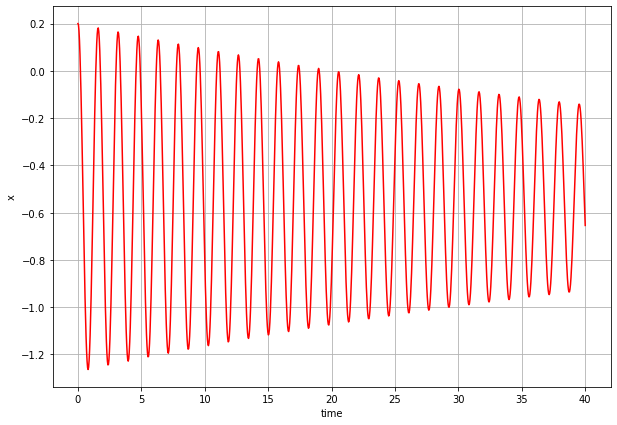

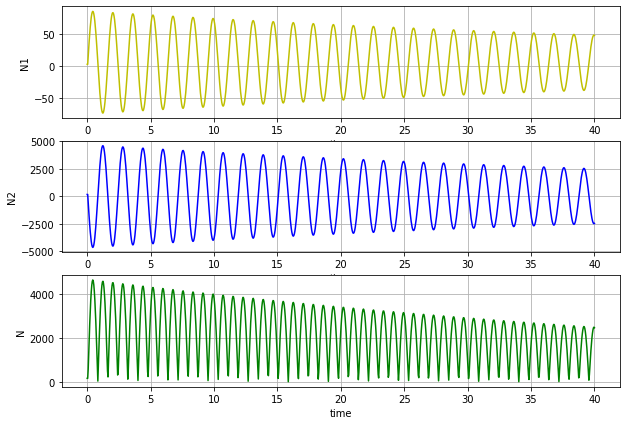

In [ ]:
rk = Runge_Kutta_v_3(m = 10000)
t1 = rk.simulate_and_plot(t = 40, r = 0.04, f = 0.2)

# Задание 4


Построим модель движения шарика M, в постановке задания 2, усложняя модель движением шарика  в среде с сопротивлением. Значение коэффициента силы сопротивления по умолчанию f = 0.1. Исследовать две возможных модели силы сопротивления: линейную и квадратичную от скорости шарика. Кроме графика закона относительного движения шарика, построить графики нормальных составляющих сил реакций связи  N1 и N2 , а также их результирующей N = sqrt(N1^2+N2^2).

## Code

In [ ]:
class Runge_Kutta_v_4(Runge_Kutta):
  def __init__(self, alpha = math.radians(60), c = 1.1, l0 = 0.3, m = 0.01, w = 1 / (4 * math.pi)):
    self.alpha = alpha
    self.c = c
    self.l0 = l0
    self.m = m
    self.w = w

  def N2_f(self, t, y1, y2):
    return 2 * self.m * self.w * y2 

  def N1_f(self, t, y1, y2):
    return  const.g * math.cos(self.alpha) - \
      self.m *self.w * self.w * y2 * math.cos(self.alpha) * math.sin(self.alpha)

  def F(self, t, y1, y2, f): 
    return -B_func(self.alpha, self.c, self.l0, self.m) \
    - k_sqr_func(self.m, self.w,self.alpha, self.c) * y1 \
    #- np.sign(y2) * f * math.sqrt((self.N1_f( t, y1, y2) / self.m)**2 + (self.N2_f( t, y1, y2) / self.m)**2)

  def F1(self, t, y1, y2, f): 
    return self.F(t, y1, y2, f) - (f * y2) / self.m

  def F2(self, t, y1, y2, f): 
    return self.F(t, y1, y2, f) - (f * y2**2 * np.sign(y2)) / self.m

  def runge_kutta1(self, t, y1, y2, h, f):
    k1 = h * self.F1(t, y1, y2, f)
    k2 = h * self.F1(t + h / 2, y1 + h / 2 * y2 + h / 8 * k1, y2 + k1 / 2, f)
    k3 = h * self.F1(t + h / 2, y1 + h / 2 * y2 + h / 8 * k2, y2 + k2 / 2, f)
    k4 = h * self.F1(t + h, y1 + h * y2 + h / 2 * k3, y2 + k3, f)
    return y1 + h * (y2 + (k1 + k2 + k3) / 6), y2 + (k1 + 2 * k2 + 2 * k3 + k4) / 6

  def runge_kutta2(self, t, y1, y2, h, f):
    k1 = h * self.F2(t, y1, y2, f)
    k2 = h * self.F2(t + h / 2, y1 + h / 2 * y2 + h / 8 * k1, y2 + k1 / 2, f)
    k3 = h * self.F2(t + h / 2, y1 + h / 2 * y2 + h / 8 * k2, y2 + k2 / 2, f)
    k4 = h * self.F2(t + h, y1 + h * y2 + h / 2 * k3, y2 + k3, f)
    return y1 + h * (y2 + (k1 + k2 + k3) / 6), y2 + (k1 + 2 * k2 + 2 * k3 + k4) / 6

  def simulate1(self, time, y1, y2, h, f):
    y1_arr = np.array([y1])
    y2_arr = np.array([y2])
    N1_arr = [self.N1_f(time[0], y1_arr[0], y2_arr[0])]
    N2_arr = [self.N2_f(time[0], y1_arr[0], y2_arr[0])]
    N_arr = [math.sqrt(N1_arr[0]**2 + N2_arr[0]**2)]

    for i, t in enumerate(time[1:]):
      y1_new, y2_new = self.runge_kutta1(t, y1_arr[i], y2_arr[i], h, f)
      y1_arr = np.append(y1_arr, y1_new)
      y2_arr = np.append(y2_arr, y2_new)

      N1_new = self.N1_f(t, y1_arr[i], y2_arr[i])
      N2_new = self.N2_f(t, y1_arr[i], y2_arr[i])
      N_new = math.sqrt(N1_new**2 + N2_new**2)
      N1_arr.append(N1_new)
      N2_arr.append(N2_new)
      N_arr.append(N_new)

    return y1_arr, N1_arr, N2_arr, N_arr

  def simulate2(self, time, y1, y2, h, f):
    y1_arr = np.array([y1])
    y2_arr = np.array([y2])
    N1_arr = [self.N1_f(time[0], y1_arr[0], y2_arr[0])]
    N2_arr = [self.N2_f(time[0], y1_arr[0], y2_arr[0])]
    N_arr = [math.sqrt(N1_arr[0]**2 + N2_arr[0]**2)]

    for i, t in enumerate(time[1:]):
      y1_new, y2_new = self.runge_kutta2(t, y1_arr[i], y2_arr[i], h, f)
      y1_arr = np.append(y1_arr, y1_new)
      y2_arr = np.append(y2_arr, y2_new)

      N1_new = self.N1_f(t, y1_arr[i], y2_arr[i])
      N2_new = self.N2_f(t, y1_arr[i], y2_arr[i])
      N_new = math.sqrt(N1_new**2 + N2_new**2)
      N1_arr.append(N1_new)
      N2_arr.append(N2_new)
      N_arr.append(N_new)

    return y1_arr, N1_arr, N2_arr, N_arr

  def simulate_and_plot(self, h = 0.0005, t = 0.5, y1 = 0.2, y2 = 0.1, f = 0.1):
    n = int(t / h)
    time = np.linspace(0, t, n)

    x_1, N1_1, N2_1, N_1 =  self.simulate1(time, y1, y2, h, f)
    x_2, N1_2, N2_2, N_2 =  self.simulate2(time, y1, y2, h, f)

    plt.rcParams["figure.figsize"] = (10,7)
    plt.plot(time, x_1, "r")
    plt.plot(time, x_2, "r--")
    plt.xlabel("time")
    plt.ylabel("x")
    plt.grid()
    plt.show()

    plt.subplot(311)
    plt.plot(time, N1_1, "y")
    plt.plot(time, N1_2, "y--")
    plt.xlabel("time")
    plt.ylabel("N1")
    plt.grid()

    plt.subplot(312)
    plt.plot(time, N2_1, "b")
    plt.plot(time, N2_2, "b--")
    plt.xlabel("time")
    plt.ylabel("N2")
    plt.grid()

    plt.subplot(313)
    plt.plot(time, N_1, "g")
    plt.plot(time, N_2, "g--")
    plt.xlabel("time")
    plt.ylabel("N")
    plt.grid()
    plt.show()

    return x_1

##Test

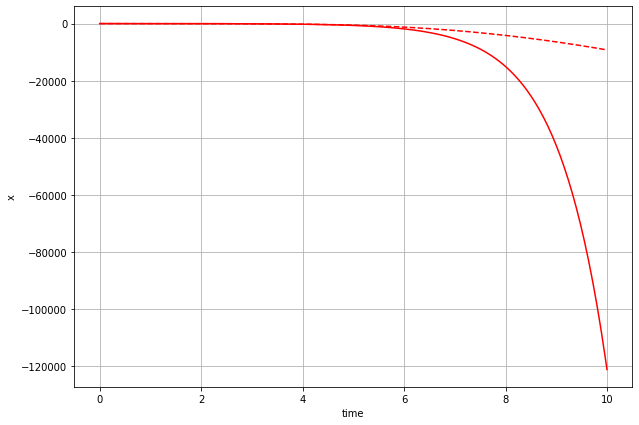

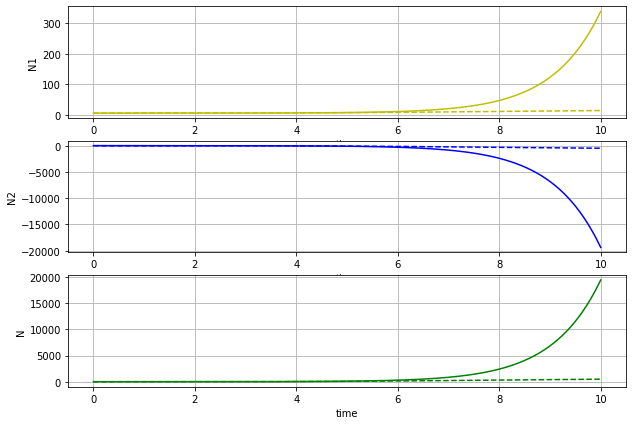

In [ ]:
r_k = Runge_Kutta_v_4( m = 1)
test1_rk = r_k.simulate_and_plot(t = 10, h = 0.04, f = 0.001)

#Задание 5

Построим модель движения шарика M, в постановке задания 2, усложняя модель неравномерным движением пластины. Построить собственные модели неравномерного вращения пластины с функциональной возможностью изменения коэффициентов этих законов. Кроме графика закона относительного движения шарика, построить графики нормальных составляющих сил реакций связи  N1 и N2, а также их результирующей N = sqrt(N1^2+N2^2).

## Code

In [ ]:
class Runge_Kutta_v_5(Runge_Kutta):
  def __init__(self, alpha = math.radians(60), c = 1.1, l0 = 0.3, m = 0.01, w = 0, e = 0, A = 0.3, B = 0.2, C = 0.1):
    self.alpha = alpha
    self.c = c
    self.l0 = l0
    self.m = m
    self.w = w
    self.e = e
    self.A = A
    self.B = B
    self.C = C

  def N2_f(self, t, y1, y2):
    return 2 * self.m * self.w * y2 

  def N1_f(self, t, y1, y2):
    return  const.g * math.cos(self.alpha) - \
      self.m *self.w * self.w * y2 * math.cos(self.alpha) * math.sin(self.alpha)

  def F(self, t, y1, y2): 
    return -B_func(self.alpha, self.c, self.l0, self.m) \
    - k_sqr_func(self.m, self.w,self.alpha, self.c) * y1 

  def runge_kutta(self, t, y1, y2, h):
    k1 = h * self.F(t, y1, y2)
    k2 = h * self.F(t + h / 2, y1 + h / 2 * y2 + h / 8 * k1, y2 + k1 / 2)
    k3 = h * self.F(t + h / 2, y1 + h / 2 * y2 + h / 8 * k2, y2 + k2 / 2)
    k4 = h * self.F(t + h, y1 + h * y2 + h / 2 * k3, y2 + k3)
    return y1 + h * (y2 + (k1 + k2 + k3) / 6), y2 + (k1 + 2 * k2 + 2 * k3 + k4) / 6

  def  w_func(self, i, t):
    if i == 2:
      return self.C + 0.1 * self.B * t
    if i == 3:
      return self.C + self.B * t + 0.01 * self.A * t*t
    if i == 4:
      return self.A * math.sin(self.B * t)
    else:
      return self.C
  
  def  e_func(self, i, t):
    if i == 2:
      return 0.1 * self.B
    if i == 3:
      return self.B + 0.02 * self.A * t
    if i == 4:
      return self.A * self.B * math.cos(self.B * t)
    else:
      return 0

  def simulate(self, time, y1, y2, h, w_i, e_i):
    self.w = self.w_func(w_i, time[0])
    self.e = self.e_func(e_i, time[0])

    y1_arr = np.array([y1])
    y2_arr = np.array([y2])
    N1_arr = [self.N1_f(time[0], y1_arr[0], y2_arr[0])]
    N2_arr = [self.N2_f(time[0], y1_arr[0], y2_arr[0])]
    N_arr = [math.sqrt(N1_arr[0]**2 + N2_arr[0]**2)]

    for i, t in enumerate(time[1:]):
      self.w = self.w_func(w_i, t)
      self.e = self.e_func(e_i, t)

      y1_new, y2_new = self.runge_kutta(t, y1_arr[i], y2_arr[i], h)
      y1_arr = np.append(y1_arr, y1_new)
      y2_arr = np.append(y2_arr, y2_new)

      N1_new = self.N1_f(t, y1_arr[i], y2_arr[i])
      N2_new = self.N2_f(t, y1_arr[i], y2_arr[i])
      N_new = math.sqrt(N1_new**2 + N2_new**2)
      N1_arr.append(N1_new)
      N2_arr.append(N2_new)
      N_arr.append(N_new)

    return y1_arr, N1_arr, N2_arr, N_arr

  def simulate_and_plot(self, h = 0.0005, t = 0.5, y1 = 0.2, y2 = 0.1, f = 0.1, w_i = 1, e_i = 1):
    n = int(t / h)
    time = np.linspace(0, t, n)

    x, N1, N2, N =  self.simulate(time, y1, y2, h, w_i, e_i)

    plt.rcParams["figure.figsize"] = (10,7)
    plt.plot(time, x, "r")
    plt.xlabel("time")
    plt.ylabel("x")
    plt.grid()
    plt.show()

    plt.subplot(311)
    plt.plot(time, N1, "y")
    plt.xlabel("time")
    plt.ylabel("N1")
    plt.grid()

    plt.subplot(312)
    plt.plot(time, N2, "b")
    plt.xlabel("time")
    plt.ylabel("N2")
    plt.grid()

    plt.subplot(313)
    plt.plot(time, N, "g")
    plt.xlabel("time")
    plt.ylabel("N")
    plt.grid()
    plt.show()

    return x

## Test

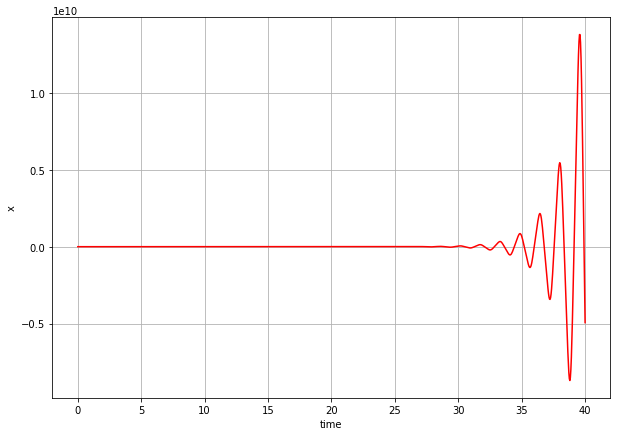

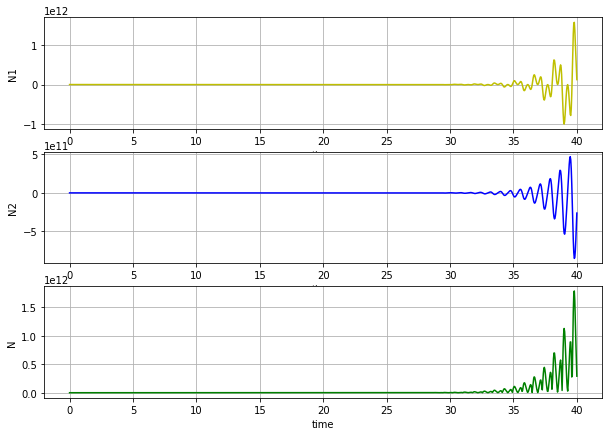

In [ ]:
r_k = Runge_Kutta_v_5(A = 10, B = 4, C = 1, m = 1)
test1_rk = r_k.simulate_and_plot(t = 40, h = 0.04, w_i = 4, e_i = 2)